In [ ]:
from cProfile import label
import warnings
warnings.filterwarnings('ignore')
# Import libraries
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import missingno
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
name = pd.read_excel("short_data.xlsx", sheet_name="Name", index_col=0)     # 8208 cells
public_date = pd.read_excel("short_data.xlsx", sheet_name="Public Date", index_col=0, parse_dates=True)
ocf = pd.read_excel("short_data.xlsx", sheet_name="OCF", index_col=0)   # 1113 missing values   86%
roa = pd.read_excel("short_data.xlsx", sheet_name="ROA", index_col=0)   # 1424    83%
ta = pd.read_excel("short_data.xlsx", sheet_name="TA", index_col=0)   # 1115   86%
mv = pd.read_excel("short_data.xlsx", sheet_name="MV", index_col=0)   # 1795    78%
total_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Lia", index_col=0)    # 1114    86%
sales = pd.read_excel("short_data.xlsx", sheet_name="Sales", index_col=0)   # 1104    87%
tangible_FA = pd.read_excel("short_data.xlsx", sheet_name="Tangible FA", index_col=0)   # 1124    86%
total_ca = pd.read_excel("short_data.xlsx", sheet_name="Total CA", index_col=0)   # 1114    86%
current_lia = pd.read_excel("short_data.xlsx", sheet_name="Total Current Lia", index_col=0)   # 1114    86%
fixed_assets = pd.read_excel("short_data.xlsx", sheet_name="Fixed assets", index_col=0)
accounts_receivable = pd.read_excel("short_data.xlsx", sheet_name="Accounts Receivable", index_col=0)
costs_of_revenue = pd.read_excel("short_data.xlsx", sheet_name="Costs of revenue", index_col=0)
ebit = pd.read_excel("short_data.xlsx", sheet_name="EBIT", index_col=0)
# eps = pd.read_excel("short_data.xlsx", sheet_name="EPS", index_col=0)
equity = pd.read_excel("short_data.xlsx", sheet_name="Equity", index_col=0)
avg_receivable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Receivable days", index_col=0)
avg_payable_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Payable days", index_col=0)
avg_inventory_days = pd.read_excel("short_data.xlsx", sheet_name="Avg. Inventory days", index_col=0)
# Biến vĩ mô
gdp = pd.read_excel("short_data.xlsx", sheet_name="GDP", index_col=0)
cpi = pd.read_excel("short_data.xlsx", sheet_name="CPI", index_col=0)
interest_rates = pd.read_excel("short_data.xlsx", sheet_name="Interest rates", index_col=0)

In [ ]:
# Drop companies are established under 5 years
com_under5years = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2015:
    com_under5years.append(i)
print(len(com_under5years))  # 168 companies are established under 5 years.

name.drop(com_under5years,axis='index', inplace=True)   # 516 remained companies
ocf.drop(com_under5years,axis='columns', inplace=True)
roa.drop(com_under5years,axis='columns', inplace=True)
ta.drop(com_under5years,axis='columns', inplace=True)
mv.drop(com_under5years,axis='columns', inplace=True)
total_lia.drop(com_under5years,axis='columns', inplace=True)
sales.drop(com_under5years,axis='columns', inplace=True)
tangible_FA.drop(com_under5years,axis='columns', inplace=True)
total_ca.drop(com_under5years,axis='columns', inplace=True)
current_lia.drop(com_under5years,axis='columns', inplace=True)
fixed_assets.drop(com_under5years,axis='columns', inplace=True)
accounts_receivable.drop(com_under5years,axis='columns', inplace=True)
costs_of_revenue.drop(com_under5years,axis='columns', inplace=True)
ebit.drop(com_under5years,axis='columns', inplace=True)
# eps.drop(com_under5years,axis='columns', inplace=True)
equity.drop(com_under5years,axis='columns', inplace=True)
avg_receivable_days.drop(com_under5years,axis='columns', inplace=True)
avg_payable_days.drop(com_under5years,axis='columns', inplace=True)
avg_inventory_days.drop(com_under5years,axis='columns', inplace=True)
gdp.drop(com_under5years,axis='columns', inplace=True)
cpi.drop(com_under5years,axis='columns', inplace=True)
interest_rates.drop(com_under5years,axis='columns', inplace=True)
public_date = public_date.loc[name.index, :]

public_date.shape

industry = name['TRBC Economic Sector Name'].value_counts().index.tolist()

168


Technology

In [ ]:
# Technology
for i in name.index:
  if "Technology" not in name["TRBC Economic Sector Name"][i]:
    name = name.drop(labels=i, axis=0)
    public_date = public_date.drop(labels=i, axis=0)

In [ ]:
def drop_company(data, name):
  for i in data.columns:
    if i not in name.index:
      del data[i]
  return data

ocf = drop_company(ocf, name)
roa = drop_company(roa, name)
ta = drop_company(ta, name)
mv = drop_company(mv, name)
total_lia = drop_company(total_lia, name)
sales = drop_company(sales, name)
tangible_FA = drop_company(tangible_FA, name)
total_ca = drop_company(total_ca, name)
current_lia = drop_company(current_lia, name)
fixed_assets = drop_company(fixed_assets, name)
accounts_receivable = drop_company(accounts_receivable, name)
costs_of_revenue = drop_company(costs_of_revenue, name)
ebit = drop_company(ebit, name)
# eps = drop_company(eps, name)
equity = drop_company(equity, name)
avg_receivable_days = drop_company(avg_receivable_days, name)
avg_payable_days = drop_company(avg_payable_days, name)
avg_inventory_days = drop_company(avg_inventory_days, name)
gdp = drop_company(gdp, name)
cpi = drop_company(cpi, name)
interest_rates = drop_company(interest_rates, name)


In [ ]:
# Fill Avg. Inventory days

# Cách 1: For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

avg_inventory_days = avg_inventory_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_inventory_days.isnull().sum().sum())   # 48 (VNF.HN, VNT.HN, VNL.HM, TVC.HN bị NaN nguyên cột)

# Fill Avg. Payable days

avg_payable_days = avg_payable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_payable_days.isnull().sum().sum())   # 0

# Fill Avg. Receivable days

avg_receivable_days = avg_receivable_days.interpolate(method='linear', limit_direction='both', axis=0)
print(avg_receivable_days.isnull().sum().sum())  # 0

# Fill Equity

equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
print(equity.isnull().sum().sum())

# Fill Fixed Assets

fixed_assets = fixed_assets.interpolate(method='linear', limit_direction='both', axis=0)
print(fixed_assets.isnull().sum().sum())

# Fill EBIT

ebit = ebit.interpolate(method='linear', limit_direction='both', axis=0)
print(ebit.isnull().sum().sum())

# Fill cost of revenue

costs_of_revenue = costs_of_revenue.interpolate(method='linear', limit_direction='both', axis=0)
print(costs_of_revenue.isnull().sum().sum())

# Fill A.R

accounts_receivable = accounts_receivable.interpolate(method='linear', limit_direction='both', axis=0)
print(accounts_receivable.isnull().sum().sum())

0
0
0
0
0
0
0
0


In [ ]:
def detect_nan(data):
  nan_values = data.isna()
  nan_columns = nan_values.any()
  columns_with_nan = data.columns[nan_columns].tolist()
  return (columns_with_nan)

detect_nan(avg_inventory_days)


def fix_negative(data):
  for j in range(data.shape[1]):
    for i in range(data.shape[0]):
      if data.iloc[i,j] < 0:
        data.iloc[i,j] = 0-data.iloc[i,j]

fix_negative(costs_of_revenue)
fix_negative(accounts_receivable)
fix_negative(avg_inventory_days)
fix_negative(avg_receivable_days)
fix_negative(avg_payable_days)

In [ ]:
# # Calculate NI
# ni = roa * ta

# Calculate Size
size = np.log(mv)

# # Calculate Leverage
# lev = total_lia / ta

# Calculate PPE
ppe = tangible_FA / sales

# Calculate Liquidity
liq = total_ca / current_lia

# Calculate Growth                                            (based on 2010-2020)
growth = sales.pct_change(periods=1)
growth.drop(growth.index[0], axis='index', inplace=True)

# Calculate Inv turnover ratio
inv_turnover = 365 / avg_inventory_days

# Calculate Inv
inv = sales/inv_turnover

# Calculate Quick ratio
quick = (total_ca - inv) / current_lia

# Calculate FA turnover ratio
fa_turnover = sales / fixed_assets

# Calculate TA turnover ratio
ta_turnover = sales / ta

# Calculate DSO
dso = accounts_receivable / (sales / 365)

# Calculate Capital intensity
capital_intensity = ta / sales

# Calculate Expense revenue ratio
expense_revenue = costs_of_revenue / sales

# Calculate Operating margin
operating_margin = ebit / sales

# # Calculate Net profit margin
# net_profit_margin = ni / sales

# Calculate BEP
bep = ebit / ta

# # Calculate ROE
# roe = ni / equity

# Calculate growth of CCC
ccc = avg_inventory_days + avg_receivable_days - avg_payable_days

# Drop year 2009
# ni.drop(ni.index[0], axis='index', inplace=True)
ocf.drop(ocf.index[0], axis='index', inplace=True)
size.drop(size.index[0], axis='index', inplace=True)
# lev.drop(lev.index[0], axis='index', inplace=True)
ppe.drop(ppe.index[0], axis='index', inplace=True)
liq.drop(liq.index[0], axis='index', inplace=True)
inv_turnover.drop(inv_turnover.index[0], axis='index', inplace=True)
quick.drop(quick.index[0], axis='index', inplace=True)
fa_turnover.drop(fa_turnover.index[0], axis='index', inplace=True)
ta_turnover.drop(ta_turnover.index[0], axis='index', inplace=True)
dso.drop(dso.index[0], axis='index', inplace=True)
capital_intensity.drop(capital_intensity.index[0], axis='index', inplace=True)
expense_revenue.drop(expense_revenue.index[0], axis='index', inplace=True)
operating_margin.drop(operating_margin.index[0], axis='index', inplace=True)
# net_profit_margin.drop(net_profit_margin.index[0], axis='index', inplace=True)
bep.drop(bep.index[0], axis='index', inplace=True)
# roe.drop(roe.index[0], axis='index', inplace=True)
roa.drop(roa.index[0], axis='index', inplace=True)
# eps.drop(eps.index[0], axis='index', inplace=True)
ccc.drop(ccc.index[0], axis='index', inplace=True)
gdp.drop(gdp.index[0], axis='index', inplace=True)
cpi.drop(cpi.index[0], axis='index', inplace=True)
interest_rates.drop(interest_rates.index[0], axis='index', inplace=True)

# Calculate Age of companies
ind = list(range(2010, 2021))
col = size.columns
age = pd.DataFrame(columns=size.columns)

for i in ind:
  list_year = []
  for j in size.columns:
    num = i - public_date.loc[j,'Organization Founded Year']
    list_year.append(num)
  age_length = len(age)
  age.loc[age_length] = list_year
age.index = size.index

age = age.replace(list(range(-5,0)), np.NaN)

In [ ]:
cols=[]
for j in range(len(total_ca.columns)):
  for i in range(len(total_ca.index)):
    if total_ca.iloc[i,j] < inv.iloc[i,j]:
      cols.append(total_ca.columns[j])
      break
print(len(cols))

cols=[]
for j in range(len(ebit.columns)):
  for i in range(len(ebit.index)):
    if sales.iloc[i,j] < ebit.iloc[i,j]:
      cols.append(ebit.columns[j])
      break
print(len(cols))

# cols=[]
# for j in range(len(ni.columns)):
#   for i in range(len(ni.index)):
#     if sales.iloc[i,j] < ni.iloc[i,j]:
#       cols.append(ni.columns[j])
#       break
# print(len(cols))


1
1


In [ ]:
roatb = roa.mean()
roatb = roatb.values
roatb = np.mean(roatb)
print(roatb)

0.04793558691176397


In [ ]:
print(size.index)

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Year')


In [ ]:
# ROA > ROA TB --> Nhóm profit (có lợi nhuận ròng và dòng tiền dương từ hoạt động kd)
# ROA < ROA TB <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

target = pd.DataFrame(np.random.randn(11, 16), columns=size.columns, index = size.index)
for i in range(len(size.index)):
  for j in range(len(size.columns)):
    if roa.iloc[i,j] > roatb:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())

      SMT.HN  VLA.HN  ELC.HM  VIE.HN  PSD.HN  ST8.HM  UNI.HN  SAM.HM  VTC.HN  VTB.HM  TST.HN  STC.HN  POT.HN  ONE.HN  ITD.HM  CMG.HM
Year                                                                                                                                
2010     1.0     1.0     1.0     0.0     0.0     1.0     1.0     0.0     0.0     1.0     1.0     1.0     0.0     1.0     1.0     0.0
2011     0.0     1.0     1.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0     0.0     1.0     0.0     1.0     0.0     0.0
2012     1.0     1.0     1.0     0.0     0.0     1.0     1.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0
2013     1.0     1.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     1.0     0.0     1.0     0.0     0.0     0.0     0.0
2014     1.0     1.0     1.0     0.0     0.0     1.0     0.0     0.0     1.0     1.0     0.0     1.0     0.0     0.0     0.0     1.0
2015     1.0     1.0     1.0     0.0     0.0     1.0     1.0     0.0 

In [ ]:
# # NI > 0 & OCF > 0 --> Nhóm profit (có lợi nhuận ròng và lợi nhuận từ hoạt động kd)
# # NI<= 0 & OCF <= 0 --> Nhóm loss (không có lợi nhuận từ hđkd)

# target = pd.DataFrame(np.random.randn(11, 16), columns=size.columns, index = size.index)
# for i in range(len(size.index)):
#   for j in range(len(size.columns)):
#     if ni.iloc[i,j] > 0 and ocf.iloc[i,j] > 0:
#       target.iloc[i,j] = 1
#     else:
#       target.iloc[i,j] = 0
# print(target.to_string())

In [ ]:
data = pd.DataFrame()
data['Size'] = size.values.flatten()
# data['Leverage'] = lev.values.flatten()
data['Growth'] = growth.values.flatten()
data['PPE'] = ppe.values.flatten()
data['Liquidity'] = liq.values.flatten()
data['Age'] = age.values.flatten()
data['Quick ratio'] = quick.values.flatten()
data['Inventory turnover ratio'] = inv_turnover.values.flatten()
data['FA turnover ratio'] = fa_turnover.values.flatten()
data['TA turnover ratio'] = ta_turnover.values.flatten()
data['DSO'] = dso.values.flatten()
data['Capital intensity'] = capital_intensity.values.flatten()
data['Expense of revenue ratio'] = expense_revenue.values.flatten()
data['Operating margin'] = operating_margin.values.flatten()
# data['Net profit margin'] = net_profit_margin.values.flatten()
# data['ROA'] = roa.values.flatten()
# data['ROE'] = roe.values.flatten()
# data['EPS'] = eps.values.flatten()
data['BEP'] = bep.values.flatten()
data['CCC'] = ccc.values.flatten()
data['GDP'] = gdp.values.flatten()
data['CPI'] = cpi.values.flatten()
data['Interest rates'] = interest_rates.values.flatten()
data['Target'] = target.values.flatten()

# Set up multi index
year = np.arange(2010,2021)
com = list(size.columns)

index = pd.MultiIndex.from_product([year, com],
                           names=['Year', 'Company'])
data.index = index
print(data.shape)
data

(176, 19)


Size    Growth       PPE  Liquidity  Age  Quick ratio  \
Year Company                                                               
2010 SMT.HN   24.053126  0.085081  0.229809   1.785682    4     0.022904   
     VLA.HN   23.395482  0.524153  0.049234   9.337566    3     8.844873   
     ELC.HM   27.646439  0.065204  0.109755   1.626255    7     1.288848   
     VIE.HN         NaN  0.585827  0.038460   1.218163    4     0.811208   
     PSD.HN         NaN       NaN       NaN        NaN    2          NaN   
...                 ...       ...       ...        ...  ...          ...   
2020 STC.HN   25.290880  0.189845  0.076752   2.012882   36     0.515571   
     POT.HN   26.650190 -0.094672  0.996580   0.987410   15     0.553803   
     ONE.HN   24.307011  0.646307  0.031699   1.229033   26     1.045823   
     ITD.HM   25.901622  0.525239  0.071873   2.053246   21     1.487609   
     CMG.HM   28.966021  0.066993  0.305798   1.453444   27     1.012413   

              Inventory turnover ratio  FA turnover ratio  TA turnover ratio  \
Year Company                                                                   
2010 SMT.HN                   1.983486           1.916135           1.123105   
     VLA.HN                   9.933917           2.769476           0.510973   
     ELC.HM                   3.890621           9.660919           0.654764   
     VIE.HN                   5.221305          63.057704           1.613185   
     PSD.HN                   7.831107                NaN                NaN   
...                                ...                ...                ...   
2020 STC.HN                   4.377499          27.038653           2.462101   
     POT.HN                   2.643244          16.035315           0.514504   
     ONE.HN                   9.160783         310.312090           1.306710   
     ITD.HM                   4.325648           7.961357           1.003395   
     CMG.HM                   5.967937          17.272405           1.039658   

                     DSO  Capital intensity  Expense of revenue ratio  \
Year Company                                                            
2010 SMT.HN   624.119895           0.890388                  3.832221   
     VLA.HN   110.831015           1.957050                  0.863399   
     ELC.HM   356.236052           1.527269                  1.002706   
     VIE.HN    24.244301           0.619892                  0.182364   
     PSD.HN          NaN                NaN                       NaN   
...                  ...                ...                       ...   
2020 STC.HN    31.584253           0.406157                  0.332994   
     POT.HN    51.090231           1.943619                  0.308189   
     ONE.HN    37.755484           0.765281                  0.160022   
     ITD.HM   124.517331           0.996616                  0.728486   
     CMG.HM    68.825356           0.961855                  0.105751   

              Operating margin       BEP         CCC       GDP       CPI  \
Year Company                                                               
2010 SMT.HN          -0.092505 -0.103892  222.175056  6.423238  9.207466   
     VLA.HN          -0.030969 -0.015824  118.039542  6.423238  9.207466   
     ELC.HM           0.040382  0.026441  199.386411  6.423238  9.207466   
     VIE.HN           0.001517  0.002447   71.380643  6.423238  9.207466   
     PSD.HN                NaN       NaN   72.253736  6.423238  9.207466   
...                        ...       ...         ...       ...       ...   
2020 STC.HN           0.026169  0.064432  102.367096  2.905836  3.220934   
     POT.HN           0.021129  0.010871  237.384190  2.905836  3.220934   
     ONE.HN           0.021603  0.028229  106.188785  2.905836  3.220934   
     ITD.HM           0.151551  0.152066  145.124617  2.905836  3.220934   
     CMG.HM           0.037188  0.038662  130.020025  2.905836  3.220934   

              Interest rates  Target  
Year Compan

In [ ]:
data.dtypes

Size                        float64
Growth                      float64
PPE                         float64
Liquidity                   float64
Age                           int64
Quick ratio                 float64
Inventory turnover ratio    float64
FA turnover ratio           float64
TA turnover ratio           float64
DSO                         float64
Capital intensity           float64
Expense of revenue ratio    float64
Operating margin            float64
BEP                         float64
CCC                         float64
GDP                         float64
CPI                         float64
Interest rates              float64
Target                      float64
dtype: object

In [ ]:
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,BEP,CCC,GDP,CPI,Interest rates,Target
count,172.000000,173.000000,173.000000,173.000000,176.000000,173.000000,176.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,25.483187,0.128842,0.752233,2.812231,16.250000,2.091541,10.259759,198.137644,1.190050,244.251454,1.883766,1.344915,0.086345,0.064266,171.946304,6.001623,5.821202,3.797918,0.426136
std,1.570374,0.555140,3.995802,4.015609,7.382218,4.067018,25.326346,737.513805,0.816780,435.605936,4.458735,2.091812,0.194455,0.076459,199.315846,1.134186,4.822571,2.952332,0.495925
min,22.162001,-0.642285,0.000000,0.470033,2.000000,-4.566939,0.883505,0.243023,0.020772,6.938335,0.238596,0.077368,-0.267295,-0.241464,-128.101119,2.905836,0.631201,-3.551709,0.000000
25%,24.274990,-0.159057,0.049234,1.307250,11.000000,0.834309,3.605214,3.444402,0.536307,42.807301,0.594418,0.402748,0.020811,0.016598,78.235025,5.421883,2.795824,2.294892,0.000000
50%,25.575185,0.052471,0.112015,1.738079,16.000000,1.164976,5.159925,7.971929,0.988747,96.744141,1.011381,0.728486,0.044332,0.053433,122.255441,6.240303,3.539628,4.825874,0.000000
75%,26.672307,0.219689,0.227422,2.664157,21.000000,1.784406,7.892039,23.387591,1.682318,270.486694,1.864604,1.511071,0.097240,0.101018,208.092528,6.812246,9.094703,5.814896,1.000000
max,28.966021,4.823191,45.546401,44.427418,36.000000,43.769743,273.628326,5342.636439,4.191193,4189.891403,48.141215,21.616530,1.672834,0.382143,1866.549167,7.075789,18.677732,7.322258,1.000000


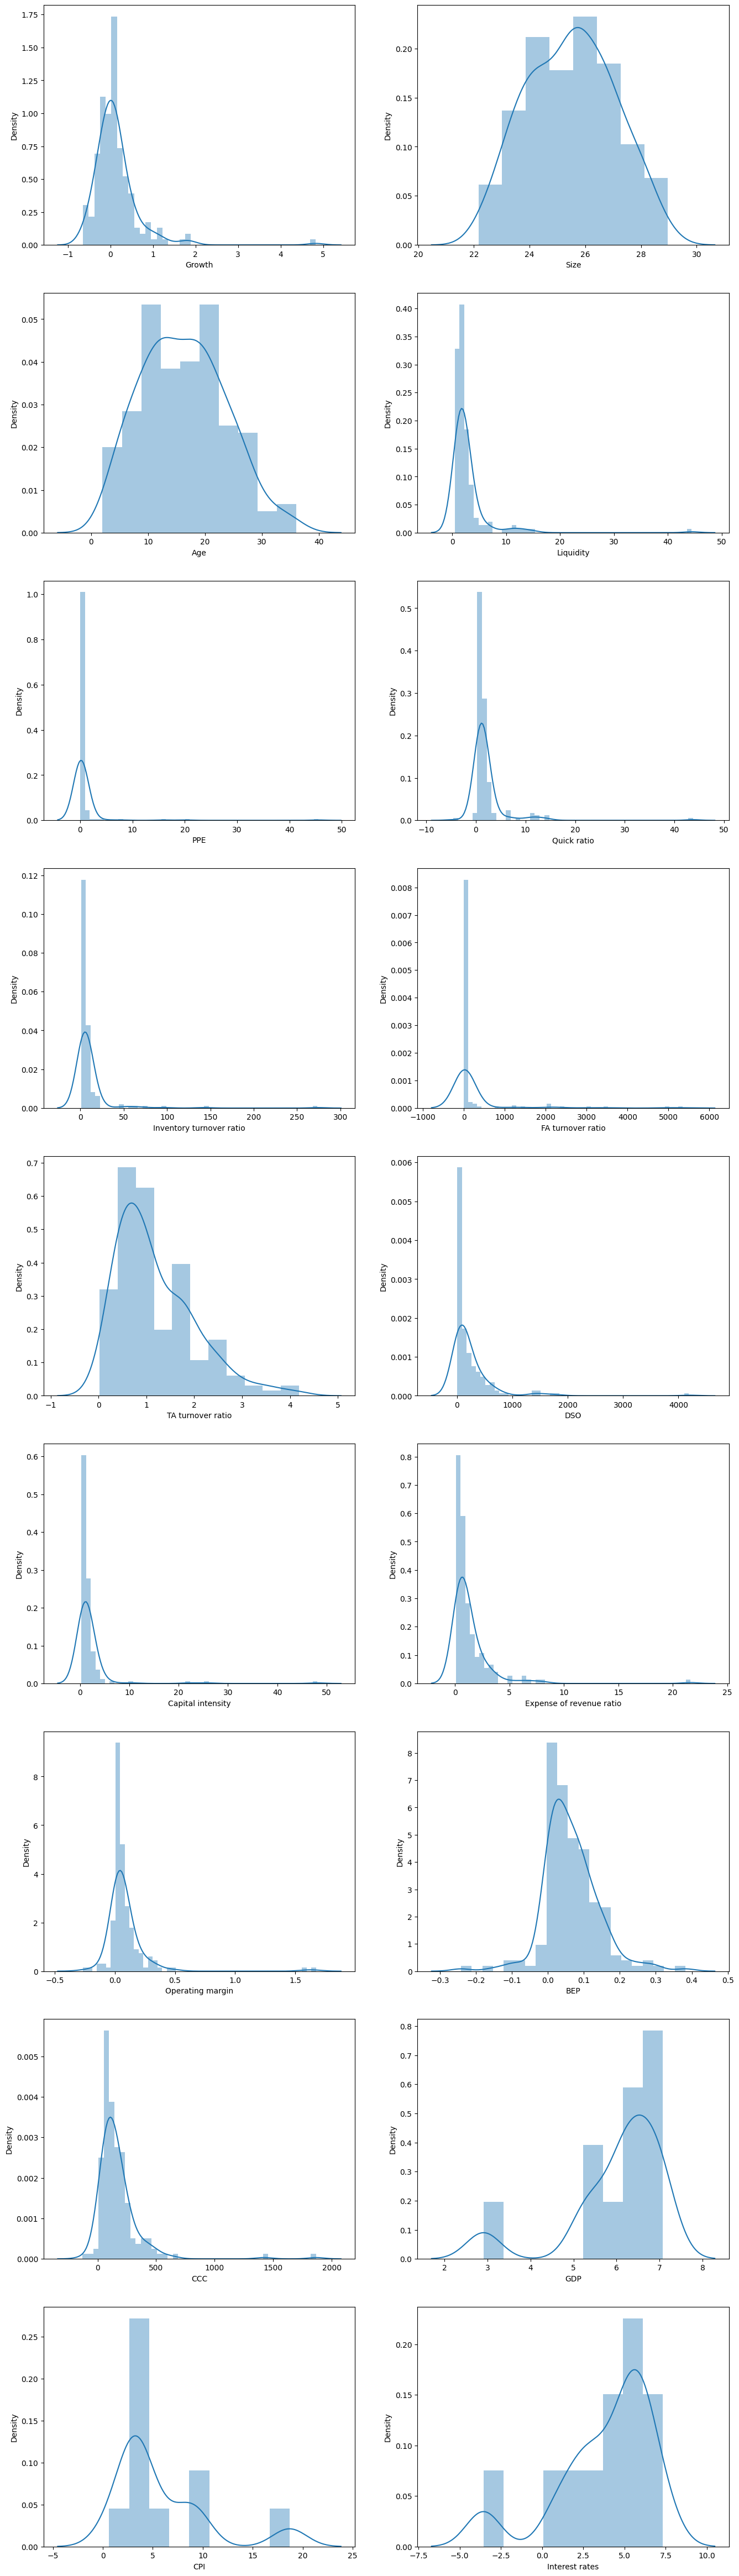

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(12,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity', 'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'BEP','CCC', 'GDP', 'CPI', 'Interest rates'])

In [ ]:
name = ['Growth', 'PPE', 'Liquidity', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'CCC']
def capping(df):
  upper_limit = df[name].mean() + 3*df[name].std()
  lower_limit = df[name].mean() - 3*df[name].std()
  for i in name:
    df[name] = np.where(
      df[name]>upper_limit,
      upper_limit,
      np.where(
          df[name]<lower_limit,
          lower_limit,
          df[name]
      )
  )

capping(data)
data.describe()

,Size,Growth,PPE,Liquidity,Age,Quick ratio,Inventory turnover ratio,FA turnover ratio,TA turnover ratio,DSO,Capital intensity,Expense of revenue ratio,Operating margin,BEP,CCC,GDP,CPI,Interest rates,Target
count,172.000000,173.000000,173.000000,173.000000,176.000000,173.000000,176.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,25.483187,0.110716,0.501348,2.639513,16.250000,1.919938,8.815646,156.295504,1.190050,226.511395,1.593381,1.260245,0.075268,0.064266,162.014207,6.001623,5.821202,3.797918,0.426136
std,1.570374,0.440154,1.794054,2.612635,7.382218,2.692061,14.111623,508.982740,0.816780,318.978420,2.186231,1.469374,0.118285,0.076459,135.591387,1.134186,4.822571,2.952332,0.495925
min,22.162001,-0.642285,0.000000,0.470033,2.000000,-4.566939,0.883505,0.243023,0.020772,6.938335,0.238596,0.077368,-0.267295,-0.241464,-128.101119,2.905836,0.631201,-3.551709,0.000000
25%,24.274990,-0.159057,0.049234,1.307250,11.000000,0.834309,3.605214,3.444402,0.536307,42.807301,0.594418,0.402748,0.020811,0.016598,78.235025,5.421883,2.795824,2.294892,0.000000
50%,25.575185,0.052471,0.112015,1.738079,16.000000,1.164976,5.159925,7.971929,0.988747,96.744141,1.011381,0.728486,0.044332,0.053433,122.255441,6.240303,3.539628,4.825874,0.000000
75%,26.672307,0.219689,0.227422,2.664157,21.000000,1.784406,7.892039,23.387591,1.682318,270.486694,1.864604,1.511071,0.097240,0.101018,208.092528,6.812246,9.094703,5.814896,1.000000
max,28.966021,1.794263,12.739638,14.859060,36.000000,14.292593,86.238796,2410.679059,4.191193,1551.069262,15.259971,7.620351,0.669709,0.382143,769.893843,7.075789,18.677732,7.322258,1.000000


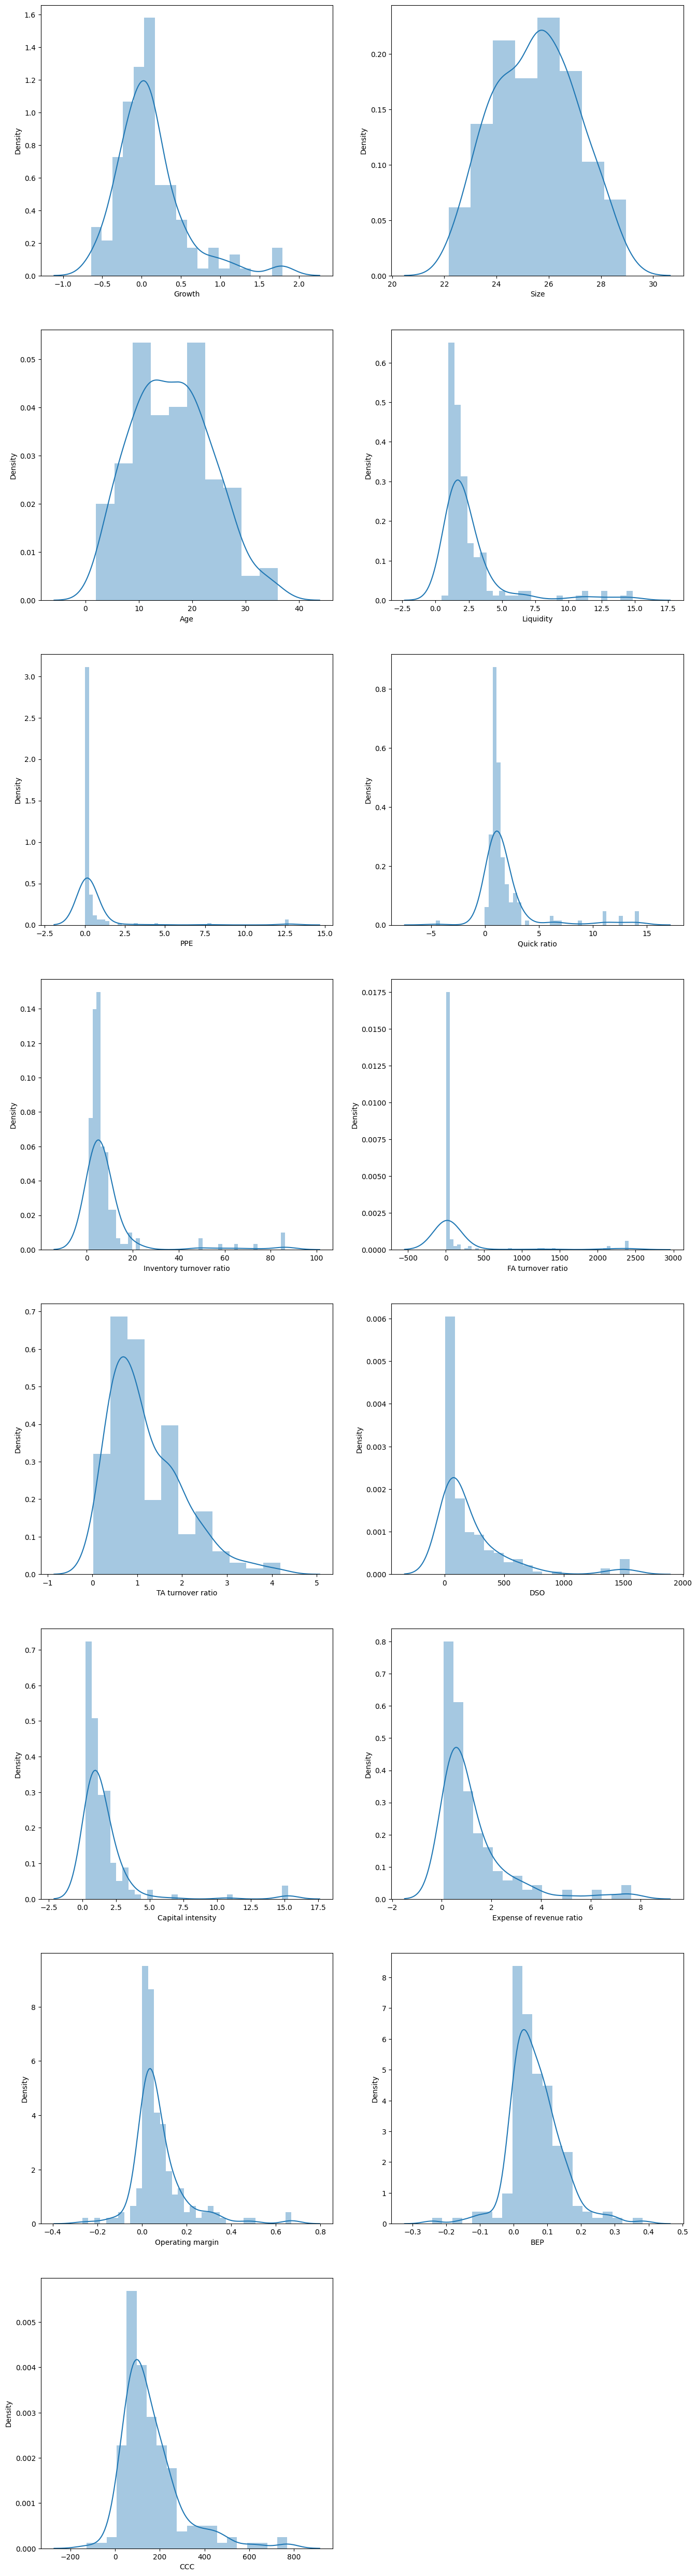

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,80))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(10,2,x)
    sns.distplot(data[i])
    x+=1
  plt.show()

density(['Growth', 'Size', 'Age', 'Liquidity',  'PPE', 'Quick ratio', 'Inventory turnover ratio', 'FA turnover ratio', 'TA turnover ratio', 'DSO', 'Capital intensity', 'Expense of revenue ratio', 'Operating margin', 'BEP', 'CCC'])

In [ ]:
(data.isnull().sum()/176*100).sort_values(axis=0, ascending=False)

Size                        2.272727
TA turnover ratio           1.704545
BEP                         1.704545
Operating margin            1.704545
Expense of revenue ratio    1.704545
Capital intensity           1.704545
Growth                      1.704545
DSO                         1.704545
FA turnover ratio           1.704545
Quick ratio                 1.704545
Liquidity                   1.704545
PPE                         1.704545
Inventory turnover ratio    0.000000
Age                         0.000000
CCC                         0.000000
GDP                         0.000000
CPI                         0.000000
Interest rates              0.000000
Target                      0.000000
dtype: float64

<Axes: >

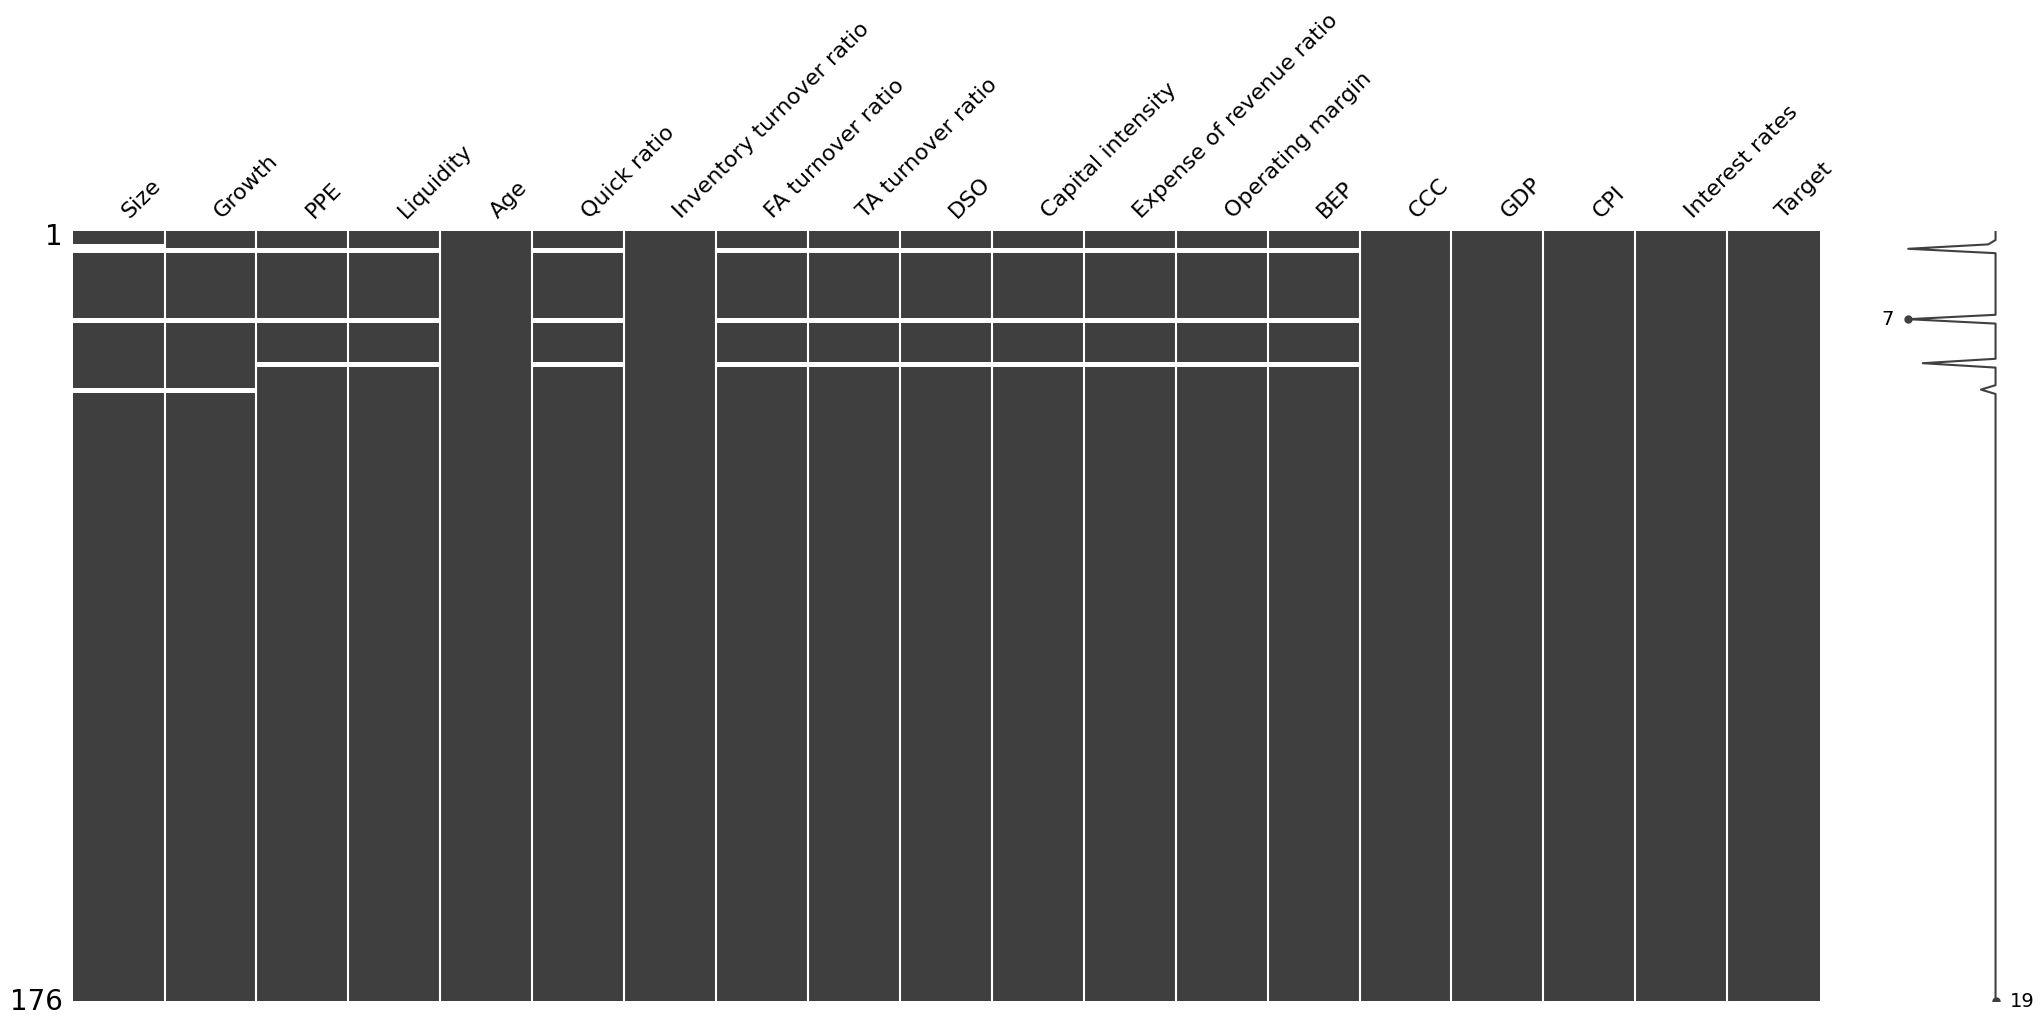

In [ ]:
import missingno

missingno.matrix(data)

In [ ]:
# Drop all columns that have at least 1 NaN
new_data = data.dropna(axis=0)
new_data = new_data.astype({'Age': int})
print(new_data.shape)

print(new_data.isnull().sum().sum())

(171, 19)
0


In [ ]:
from keras import feature_column
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Preprocess the data
scaler = MinMaxScaler()
feature= ['Size', 'Growth', 'PPE','Liquidity','Quick ratio','Capital intensity','TA turnover ratio',
          'Operating margin','Expense of revenue ratio','DSO','FA turnover ratio','BEP','Inventory turnover ratio','CCC','Age', 'GDP','CPI','Interest rates']
X = new_data[feature]
y = new_data["Target"]

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X.iloc[0:train_size], X.iloc[train_size:len(X)]
y_train, y_test = y.iloc[0:train_size], y.iloc[train_size:len(y)]

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model
# model.fit(X_train, y_train, epochs=100, batch_size=32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#scale data
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
clf=MLPClassifier(hidden_layer_sizes=[100,100], alpha=5, random_state=0, solver='lbfgs').fit(X_train_scaled,y_train)
print('Accuracy of NN classifier on training set: %.4f %%' % (100*clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on testing set: %.4f %%' % (100*clf.score(X_test_scaled, y_test)))

Accuracy of NN classifier on training set: 62.1849 %
Accuracy of NN classifier on testing set: 42.3077 %


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# from sklearn import preprocessing

# X = new_data.drop('Target', axis=1)
# y = new_data.Target


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

# Scale X
scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


Logistic regression:
[[13  3]
 [ 8 11]]
              precision    recall  f1-score   support

         0.0       0.62      0.81      0.70        16
         1.0       0.79      0.58      0.67        19

    accuracy                           0.69        35
   macro avg       0.70      0.70      0.68        35
weighted avg       0.71      0.69      0.68        35



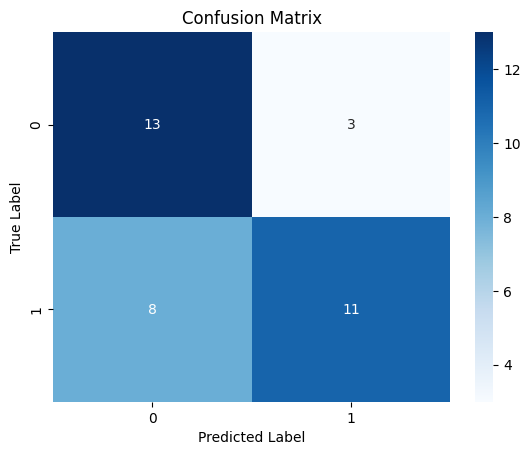

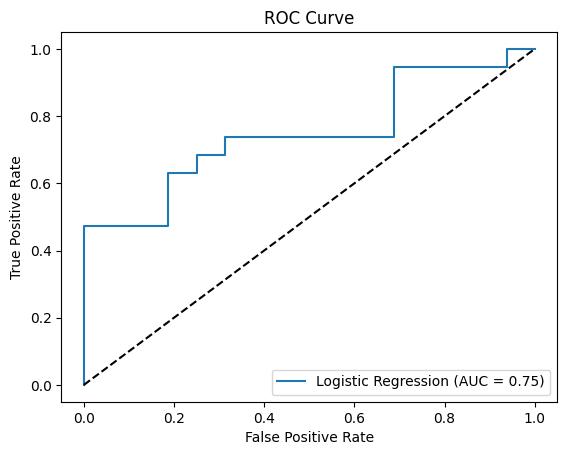

LogisticRegression(random_state=38)

In [ ]:
def baseline_model(X_train, y_train, X_test, y_test):
    baseline = LogisticRegression(random_state=38)
    baseline.fit(X_train, y_train)

    # predict on test set
    y_pred_baseline = baseline.predict(X_test)

    # print evaluation metrics
    print("\nLogistic regression:")
    print(confusion_matrix(y_test, y_pred_baseline))
    print(classification_report(y_test, y_pred_baseline))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, cmap="Blues", fmt="d",
                    xticklabels=["0", "1"],
                    yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # predict probabilities for test set
    y_pred_prob_baseline = baseline.predict_proba(X_test)[:, 1]

    # calculate ROC-AUC score
    roc_auc_baseline = roc_auc_score(y_test, y_pred_prob_baseline)

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_baseline)
    plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_baseline))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    return baseline

baseline_model(X_train, y_train, X_test, y_test)

In [ ]:
def random_forest_tuning(X_train, y_train, X_test, y_test):
# define parameter grid
    param_grid = {'n_estimators': [10],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)}
    # create grid search object
    grid = GridSearchCV(RandomForestClassifier(random_state=38), param_grid, cv=5, scoring='accuracy')

    # fit grid search object to data
    grid.fit(X_train, y_train)

    # print results
    print("Best parameters: ", grid.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))

    # use best parameters to fit model to data
    rf = grid.best_estimator_
    rf.fit(X_train, y_train)

    # predict on test set
    y_pred_rf = rf.predict(X_test)

    # print evaluation metrics
    print("\nRandom Forest:")
    print(confusion_matrix(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
                xticklabels=["0", "1"],
                yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return rf

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 10}
Best cross-validation score: 0.83

Random Forest:
[[14  2]
 [12  7]]
              precision    recall  f1-score   support

         0.0       0.54      0.88      0.67        16
         1.0       0.78      0.37      0.50        19

    accuracy                           0.60        35
   macro avg       0.66      0.62      0.58        35
weighted avg       0.67      0.60      0.58        35



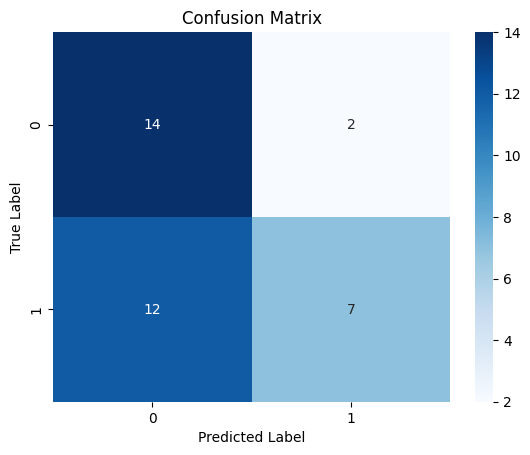

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=10, random_state=38)

In [ ]:
import numpy as np
random_forest_tuning(X_train, y_train, X_test, y_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Neural Network': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.


In [ ]:
for name, model in models.items():
  result = model.score(X_test, y_test)
  print(name + ': {:.2f}%'.format(result * 100))

Logistic Regression: 68.57%
K-Nearest Neighbors: 71.43%
Decision Tree: 74.29%
Support Vector Machine (Linear Kernel): 68.57%
Support Vector Machine (RBF Kernel): 65.71%
Neural Network: 82.86%
Random Forest: 62.86%


In [ ]:
def random_forest_tuning(X_train, y_train, X_test, y_test):
# define parameter grid
    param_grid = {'n_estimators': [10],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)}
    # create grid search object
    grid = GridSearchCV(RandomForestClassifier(random_state=38), param_grid, cv=5, scoring='accuracy')

    # fit grid search object to data
    grid.fit(X_train, y_train)

    # print results
    print("Best parameters: ", grid.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))

    # use best parameters to fit model to data
    rf = grid.best_estimator_
    rf.fit(X_train, y_train)

    # predict on test set
    y_pred_rf = rf.predict(X_test)

    # print evaluation metrics
    print("\nRandom Forest:")
    print(confusion_matrix(y_test, y_pred_rf))
    print(classification_report(y_test, y_pred_rf))

    # Create heatmap using seaborn
    sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
                xticklabels=["0", "1"],
                yticklabels=["0", "1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return rf

In [ ]:
from sklearn.decomposition import PCA

# instantiate PCA with n_components=7
pca = PCA(n_components=10)

# fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# create a new dataframe with the transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2',"PC3","PC4","PC5",'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2',"PC3","PC4","PC5",'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])


In [ ]:
from sklearn.model_selection import GridSearchCV

Best parameters:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 10}
Best cross-validation score: 0.79

Random Forest:
[[12  4]
 [11  8]]
              precision    recall  f1-score   support

         0.0       0.52      0.75      0.62        16
         1.0       0.67      0.42      0.52        19

    accuracy                           0.57        35
   macro avg       0.59      0.59      0.57        35
weighted avg       0.60      0.57      0.56        35



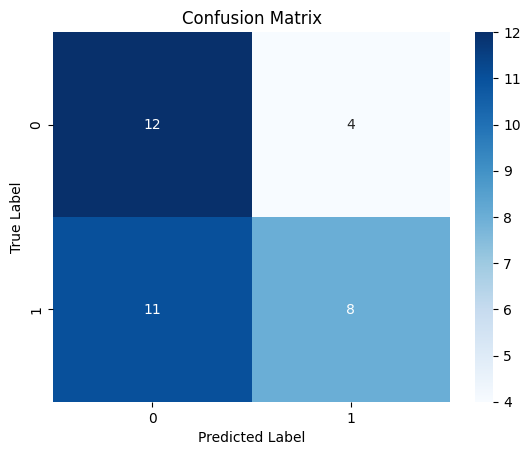

RandomForestClassifier(max_depth=9, min_samples_split=7, n_estimators=10,
                       random_state=38)

In [ ]:
import numpy as np
random_forest_tuning(X_train_pca_df, y_train, X_test_pca_df, y_test)

In [ ]:
y_test.value_counts() / len(y_test)

1.0    0.542857
0.0    0.457143
Name: Target, dtype: float64

In [ ]:
y.value_counts() / len(y)

0.0    0.561404
1.0    0.438596
Name: Target, dtype: float64

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 10}
Best cross-validation score: 0.83

Random Forest:
[[14  2]
 [12  7]]
              precision    recall  f1-score   support

         0.0       0.54      0.88      0.67        16
         1.0       0.78      0.37      0.50        19

    accuracy                           0.60        35
   macro avg       0.66      0.62      0.58        35
weighted avg       0.67      0.60      0.58        35



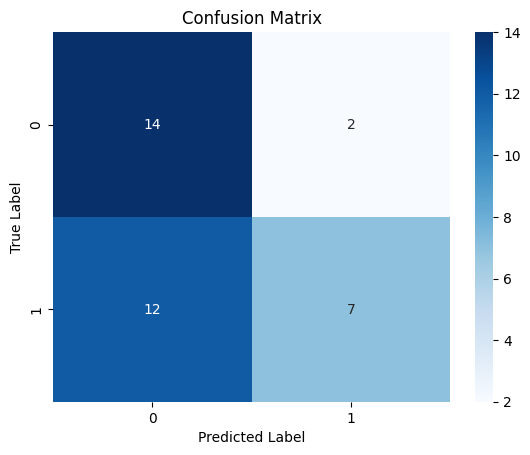

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=10, random_state=38)

In [ ]:
import numpy as np
random_forest_tuning(X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

optimal n_estimators value is 31 that accuracy is 0.7840336134453781


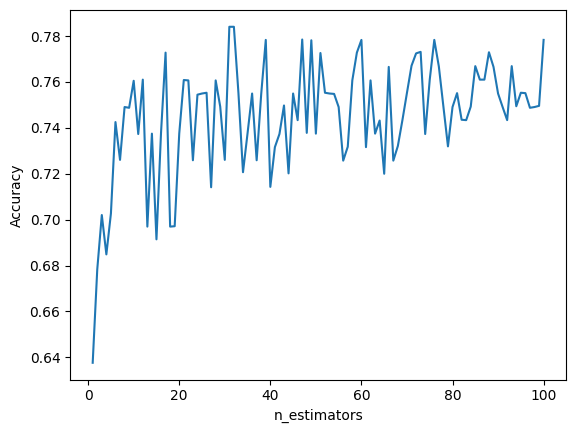

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1, 101))   # 100 trường hợp từ 1 đến 100 Decision Trees để tạo 100 Random Forest Metrics.
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

optimal n_estimators value is 31 that accuracy is 0.7840336134453781


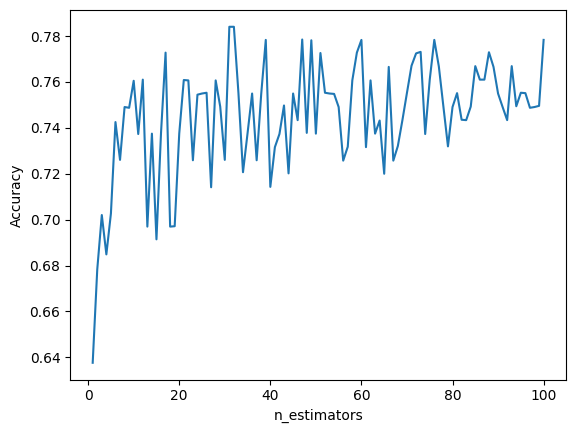

In [ ]:
print(f'optimal n_estimators value is {ind} that accuracy is {max(scores)}')

import matplotlib.pyplot as plt
plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

rf = RandomForestClassifier(n_estimators=ind, random_state=0)

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

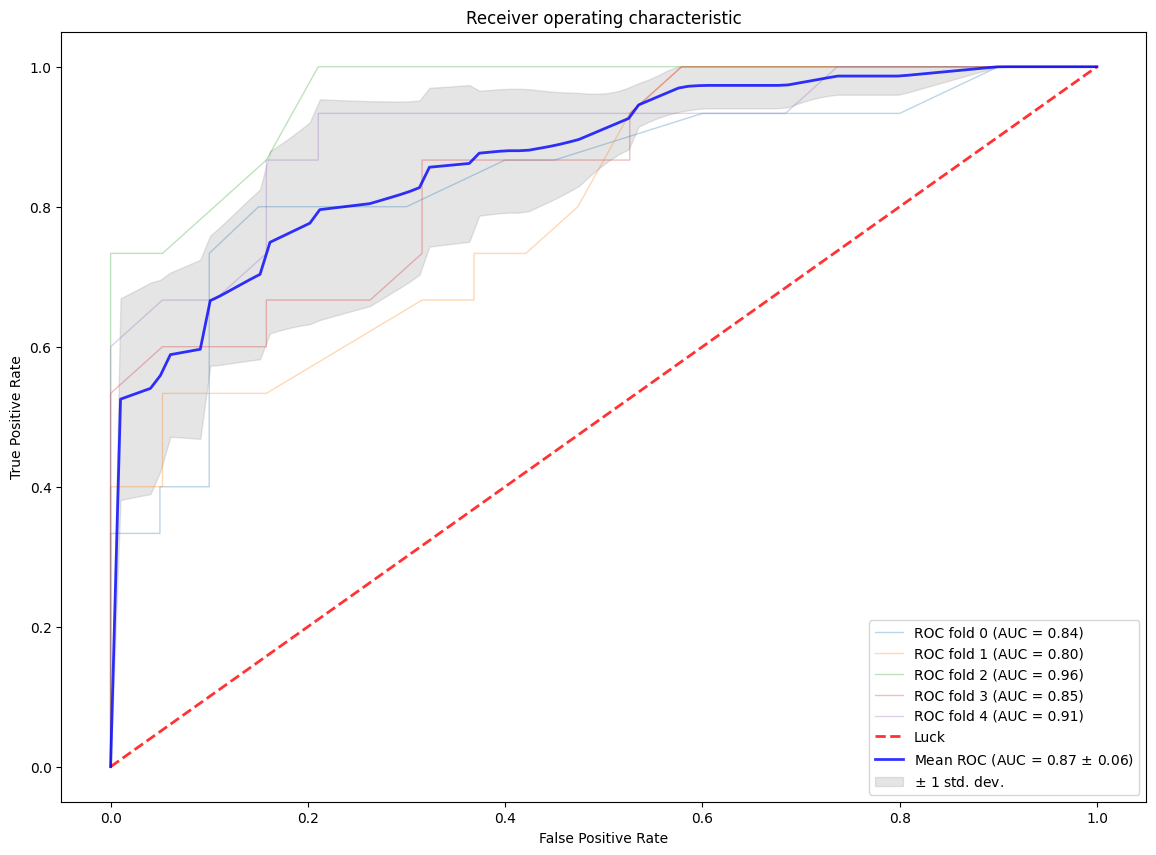

,AUC Train,AUC Test
0,1.0,0.840000
1,1.0,0.803509
2,1.0,0.961404
3,1.0,0.854386
4,1.0,0.907018


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []

for (train, test), i in zip(cv.split(X, y), range(5)):
    rf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [ ]:
ft_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(ft_imp)

Liquidity                   0.120390
Inventory turnover ratio    0.085712
CCC                         0.075274
Growth                      0.066240
Capital intensity           0.065980
FA turnover ratio           0.060490
PPE                         0.057041
DSO                         0.056692
BEP                         0.054890
Operating margin            0.052619
Expense of revenue ratio    0.050124
Age                         0.047551
TA turnover ratio           0.047454
Size                        0.041894
Quick ratio                 0.040699
CPI                         0.031793
GDP                         0.026026
Interest rates              0.019131
dtype: float64


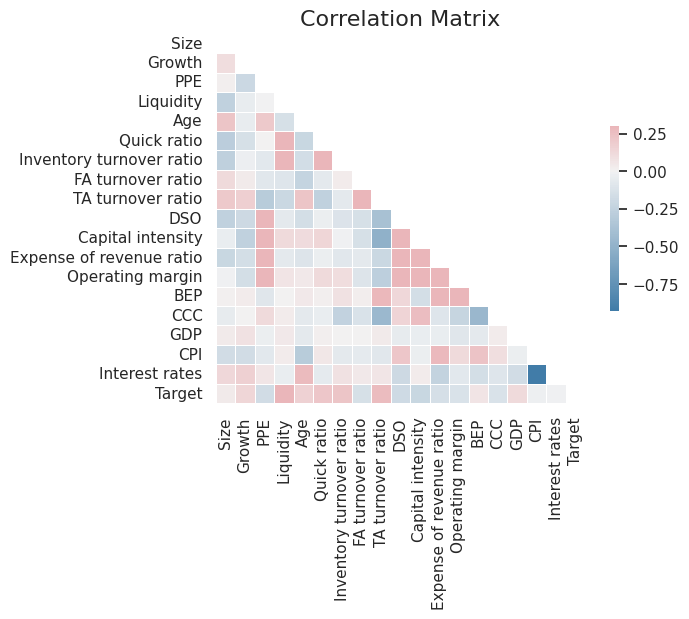

In [ ]:
def plot_correlation_matrix(corr_mat):
 sns.set(style="white")
 mask = np.zeros_like(corr_mat, dtype=np.bool)
 mask[np.triu_indices_from(mask)] = True
 fig, ax = plt.subplots()
 cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
 sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
 square=True, linewidths=.5,
 cbar_kws={"shrink": .5}, ax=ax)
 ax.set_title('Correlation Matrix', fontsize=16)
 sns.set(style="darkgrid")
corr_mat = data.select_dtypes(include='number').corr()
plot_correlation_matrix(corr_mat)

y_pred = rf.predict(X_test)

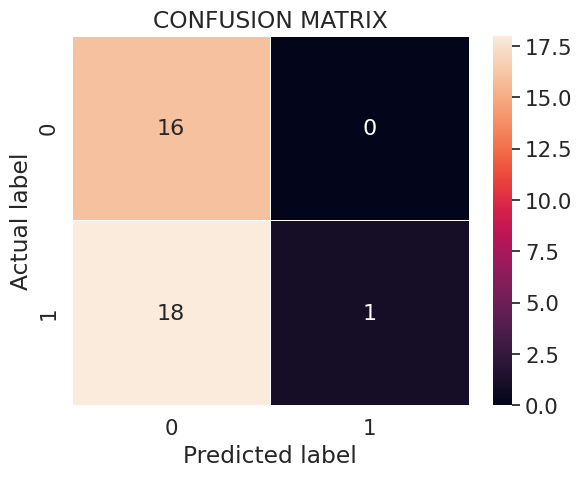

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

LABELS = [0, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, linewidths=.5, xticklabels=LABELS, yticklabels=LABELS) # font size
plt.title('CONFUSION MATRIX')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.47      1.00      0.64        16
         1.0       1.00      0.05      0.10        19

    accuracy                           0.49        35
   macro avg       0.74      0.53      0.37        35
weighted avg       0.76      0.49      0.35        35



In [ ]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])